In [8]:
import pandas as pd
import numpy as np

# Define las materias de educación secundaria
materias = ["Matemática", "Lengua y Literatura", "Inglés", "Historia", "Geografía",
            "Biología", "Física", "Química", "Educación Física", "Arte",
            "Música", "Tecnología", "Formación Ética y Ciudadana"]

# Genera datos aleatorios
num_filas = 100

nombres = ["Juan", "María", "Pedro", "Ana", "Luis", "Sofía", "José", "Laura", "Diego", "Clara"]
apellidos = ["González", "Rodríguez", "Pérez", "López", "García", "Fernández", "Martínez", "Sánchez", "Romero", "Torres"]

# Nombres y apellidos aleatorios
nombres_completos = [f"{np.random.choice(nombres)} {np.random.choice(apellidos)}" for _ in range(num_filas)]

# DNI aleatorio
dni = np.random.randint(10000000, 99999999, size=num_filas)

# Notas (1er, 2do, 3er Trimestre)
notas_1er_trimestre = np.random.randint(1, 11, size=(num_filas, len(materias)))
notas_2do_trimestre = np.random.randint(1, 11, size=(num_filas, len(materias)))
notas_3er_trimestre = np.random.randint(1, 11, size=(num_filas, len(materias)))

# Faltas (cantidad de faltas a clases)
faltas = np.random.randint(0, 30, size=(num_filas, len(materias)))

# Crea un DataFrame
data = {'Nombre y Apellido': nombres_completos,
        'DNI': dni}

for i, materia in enumerate(materias):
    data[materia + ' - 1er Trimestre'] = notas_1er_trimestre[:, i]
    data[materia + ' - 2do Trimestre'] = notas_2do_trimestre[:, i]
    data[materia + ' - 3er Trimestre'] = notas_3er_trimestre[:, i]
    data[materia + ' - Faltas'] = faltas[:, i]

df = pd.DataFrame(data)

# Muestra el DataFrame
display(df) # or print(df) to see result

,Nombre y Apellido,DNI,Matemática - 1er Trimestre,Matemática - 2do Trimestre,Matemática - 3er Trimestre,Matemática - Faltas,Lengua y Literatura - 1er Trimestre,Lengua y Literatura - 2do Trimestre,Lengua y Literatura - 3er Trimestre,Lengua y Literatura - Faltas,...,Música - 3er Trimestre,Música - Faltas,Tecnología - 1er Trimestre,Tecnología - 2do Trimestre,Tecnología - 3er Trimestre,Tecnología - Faltas,Formación Ética y Ciudadana - 1er Trimestre,Formación Ética y Ciudadana - 2do Trimestre,Formación Ética y Ciudadana - 3er Trimestre,Formación Ética y Ciudadana - Faltas
0,Sofía López,53760677,2,8,5,9,5,3,1,14,...,1,24,8,2,9,20,7,2,1,23
1,Luis González,29060543,1,8,6,19,5,4,6,15,...,9,18,10,6,10,25,1,9,6,8
2,Clara López,56312067,9,7,2,17,6,9,4,0,...,5,20,5,2,4,27,5,4,3,2
3,Sofía López,29190832,7,3,8,23,2,1,7,27,...,4,22,6,9,4,27,10,4,3,27
4,Sofía Rodríguez,56518153,4,5,1,27,2,7,5,6,...,2,0,4,6,2,7,9,7,7,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Pedro González,29198308,6,1,7,7,4,5,10,24,...,10,28,8,6,4,2,6,5,9,29
96,Laura Sánchez,48591937,4,2,4,5,8,5,5,8,...,4,25,9,6,9,26,2,3,1,9
97,Laura Pérez,25582724,2,7,10,14,5,10,8,23,...,8,8,9,8,5,29,6,8,9,1
98,Juan González,20161676,7,7,4,27,2,4,6,10,...,3,2,8,5,4,8,8,1,5,27


<ipython-input-9-9c61336957cf>:26: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(promedios_ordenados.index, rotation=45, ha='right')


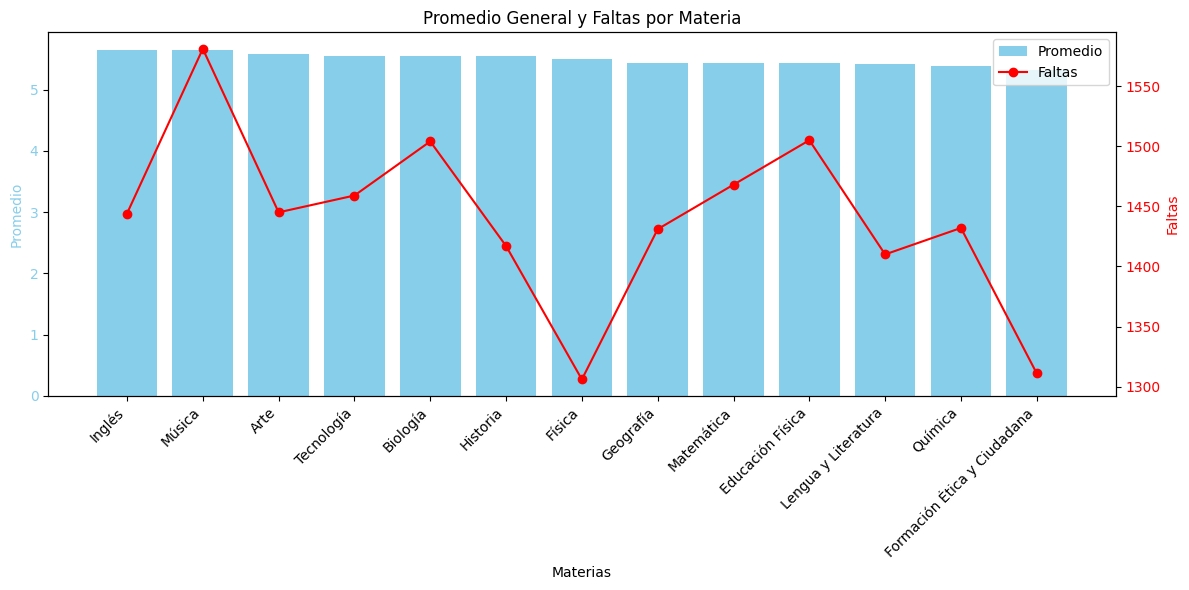

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# ... (Código para crear el DataFrame 'df' como en el ejemplo anterior) ...

# Calcular el promedio general de cada materia
promedios = df.filter(regex='Trimestre').mean(axis=0)
promedios = promedios.groupby(promedios.index.str.split(' - ').str[0]).mean()  # Agrupar por materia

# Calcular las faltas totales por materia
faltas_totales = df.filter(regex='Faltas').sum(axis=0)
faltas_totales = faltas_totales.groupby(faltas_totales.index.str.split(' - ').str[0]).sum()

# Ordenar por promedio de mayor a menor
promedios_ordenados = promedios.sort_values(ascending=False)

# Crear el gráfico de barras con dos ejes
fig, ax1 = plt.subplots(figsize=(12, 6))

# Barras para promedios
ax1.bar(promedios_ordenados.index, promedios_ordenados.values, color='skyblue', label='Promedio')
ax1.set_xlabel('Materias')
ax1.set_ylabel('Promedio', color='skyblue')
ax1.tick_params('y', labelcolor='skyblue')
ax1.set_xticklabels(promedios_ordenados.index, rotation=45, ha='right')

# Segundo eje para faltas
ax2 = ax1.twinx()
ax2.plot(faltas_totales.loc[promedios_ordenados.index].values, color='red', marker='o', label='Faltas')
ax2.set_ylabel('Faltas', color='red')
ax2.tick_params('y', labelcolor='red')

# Título y leyenda
plt.title('Promedio General y Faltas por Materia')
fig.legend(loc='upper right', bbox_to_anchor=(1, 1), bbox_transform=ax1.transAxes)

plt.tight_layout()
plt.show()